<a href="https://colab.research.google.com/github/arafaturrahman1/Food-Network/blob/main/Ayat__correction_erro_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [4]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data.zip'
extract_folder_path = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data'

# Create the output directory if it doesn't exist
os.makedirs(extract_folder_path, exist_ok=True)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

print("Unzipping completed.")


Unzipping completed.


In [5]:
import librosa
import numpy as np
from scipy.io.wavfile import write

def load_audio_files(directory):
    audio_files = []
    labels = []
    for subdir, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".wav"):
                filepath = os.path.join(subdir, filename)
                audio, sr = librosa.load(filepath, sr=None)
                category = os.path.basename(os.path.dirname(subdir))  # 'correct' or 'incorrect'
                label = os.path.basename(subdir)  # Alphabet label
                audio_files.append((audio, sr, category, label))
    return audio_files

def my_pitch_shift(audio, sr, n_steps):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

def save_audio_files(audio_files, output_dir, suffix):
    for audio, sr, category, label in audio_files:
        augmented_subdir = os.path.join(output_dir, category, label)
        os.makedirs(augmented_subdir, exist_ok=True)
        count = len([name for name in os.listdir(augmented_subdir) if os.path.isfile(os.path.join(augmented_subdir, name))])
        augmented_filepath = os.path.join(augmented_subdir, f"{label}_{suffix}_{count}.wav")
        write(augmented_filepath, sr, (audio * 32767).astype(np.int16))

def augment_data(input_dir, output_dir):
    audio_files = load_audio_files(input_dir)
    pitch_steps = [-3, 3]  # Pitch steps can be integers
    for steps in pitch_steps:
        augmented_files = [(my_pitch_shift(audio, sr, steps), sr, category, label) for audio, sr, category, label in audio_files]
        save_audio_files(augmented_files, output_dir, f"pitch_{steps}")

input_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data'
output_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented'

os.makedirs(output_directory, exist_ok=True)

augment_data(input_directory, output_directory)



In [6]:
import librosa
import numpy as np
import os
from scipy.io.wavfile import write

def load_audio_files(directory):
    audio_files = []
    labels = []
    for subdir, _, files in os.walk(directory):
        for filename in files:
            if filename.endswith(".wav"):
                filepath = os.path.join(subdir, filename)
                audio, sr = librosa.load(filepath, sr=None)
                category = os.path.basename(os.path.dirname(subdir))  # 'correct' or 'incorrect'
                label = os.path.basename(subdir)  # Alphabet label
                audio_files.append((audio, sr, category, label))
    return audio_files

def my_pitch_shift(audio, sr, n_steps):
    return librosa.effects.pitch_shift(audio, sr=sr, n_steps=n_steps)

def save_audio_files(audio_files, output_dir, suffix):
    for audio, sr, category, label in audio_files:
        augmented_subdir = os.path.join(output_dir, category, label)
        os.makedirs(augmented_subdir, exist_ok=True)
        count = len([name for name in os.listdir(augmented_subdir) if os.path.isfile(os.path.join(augmented_subdir, name))])
        augmented_filepath = os.path.join(augmented_subdir, f"{label}_{suffix}_{count}.wav")
        write(augmented_filepath, sr, (audio * 32767).astype(np.int16))
        print(f"Saved {augmented_filepath}")

def augment_data(input_dir, output_dir):
    audio_files = load_audio_files(input_dir)
    pitch_steps = [-3, 3]  # Pitch steps can be integers
    for steps in pitch_steps:
        augmented_files = [(my_pitch_shift(audio, sr, steps), sr, category, label) for audio, sr, category, label in audio_files]
        save_audio_files(augmented_files, output_dir, f"pitch_{steps}")
        print(f"Augmented data with pitch step {steps}")

input_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data'
output_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented'

os.makedirs(output_directory, exist_ok=True)

augment_data(input_directory, output_directory)

Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/10_raa/10_raa_pitch_-3_10.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/10_raa/10_raa_pitch_-3_11.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/10_raa/10_raa_pitch_-3_12.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/10_raa/10_raa_pitch_-3_13.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/10_raa/10_raa_pitch_-3_14.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/11_zaa/11_zaa_pitch_-3_10.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/11_zaa/11_zaa_pitch_-3_11.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/11_zaa/11_zaa_pitch_-3_12.wav
Saved /content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/11_zaa/11_zaa_pitch_-3_13.wav
Saved /con

In [7]:
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented'


Correct  Incorrect


In [8]:
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct'
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Incorrect'


10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha
10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha


In [12]:
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Correct/1_Alif'
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented/Incorrect/10_raa'

1_Alif_pitch_-3_0.wav	1_Alif_pitch_-3_14.wav	1_Alif_pitch_3_19.wav  1_Alif_pitch_3_5.wav
1_Alif_pitch_-3_10.wav	1_Alif_pitch_3_15.wav	1_Alif_pitch_-3_1.wav  1_Alif_pitch_3_6.wav
1_Alif_pitch_-3_11.wav	1_Alif_pitch_3_16.wav	1_Alif_pitch_-3_2.wav  1_Alif_pitch_3_7.wav
1_Alif_pitch_-3_12.wav	1_Alif_pitch_3_17.wav	1_Alif_pitch_-3_3.wav  1_Alif_pitch_3_8.wav
1_Alif_pitch_-3_13.wav	1_Alif_pitch_3_18.wav	1_Alif_pitch_-3_4.wav  1_Alif_pitch_3_9.wav
10_raa_pitch_-3_0.wav	10_raa_pitch_-3_14.wav	10_raa_pitch_3_19.wav  10_raa_pitch_3_5.wav
10_raa_pitch_-3_10.wav	10_raa_pitch_3_15.wav	10_raa_pitch_-3_1.wav  10_raa_pitch_3_6.wav
10_raa_pitch_-3_11.wav	10_raa_pitch_3_16.wav	10_raa_pitch_-3_2.wav  10_raa_pitch_3_7.wav
10_raa_pitch_-3_12.wav	10_raa_pitch_3_17.wav	10_raa_pitch_-3_3.wav  10_raa_pitch_3_8.wav
10_raa_pitch_-3_13.wav	10_raa_pitch_3_18.wav	10_raa_pitch_-3_4.wav  10_raa_pitch_3_9.wav


In [13]:
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, train_dir, val_dir, test_size=0.2):
    for category in ['Correct', 'Incorrect']:
        category_path = os.path.join(source_dir, category)
        if not os.path.exists(category_path):
            print(f"Directory {category_path} does not exist. Skipping.")
            continue

        for label in os.listdir(category_path):
            label_dir = os.path.join(category_path, label)
            if not os.path.isdir(label_dir):
                print(f"{label_dir} is not a directory. Skipping.")
                continue

            files = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.wav')]
            train_files, val_files = train_test_split(files, test_size=test_size)

            train_category_dir = os.path.join(train_dir, category, label)
            val_category_dir = os.path.join(val_dir, category, label)

            os.makedirs(train_category_dir, exist_ok=True)
            os.makedirs(val_category_dir, exist_ok=True)

            for file in train_files:
                shutil.copy(file, train_category_dir)
            for file in val_files:
                shutil.copy(file, val_category_dir)

train_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Train'
val_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Val'

os.makedirs(train_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)

split_data('/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented', train_directory, val_directory)


In [14]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

def save_mel_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

def convert_directory_to_spectrograms(input_dir, output_dir):
    for subdir, _, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(subdir, file)
                relative_path = os.path.relpath(file_path, input_dir)
                output_path = os.path.join(output_dir, relative_path.replace('.wav', '.png'))

                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                save_mel_spectrogram(file_path, output_path)

input_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Augmented'
output_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms'

os.makedirs(output_directory, exist_ok=True)

convert_directory_to_spectrograms(input_directory, output_directory)


In [15]:
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms/Correct/1_Alif'

1_Alif_pitch_-3_0.png	1_Alif_pitch_-3_14.png	1_Alif_pitch_3_19.png  1_Alif_pitch_3_5.png
1_Alif_pitch_-3_10.png	1_Alif_pitch_3_15.png	1_Alif_pitch_-3_1.png  1_Alif_pitch_3_6.png
1_Alif_pitch_-3_11.png	1_Alif_pitch_3_16.png	1_Alif_pitch_-3_2.png  1_Alif_pitch_3_7.png
1_Alif_pitch_-3_12.png	1_Alif_pitch_3_17.png	1_Alif_pitch_-3_3.png  1_Alif_pitch_3_8.png
1_Alif_pitch_-3_13.png	1_Alif_pitch_3_18.png	1_Alif_pitch_-3_4.png  1_Alif_pitch_3_9.png


In [16]:
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, train_dir, val_dir, test_size=0.2):
    for category in ['Correct', 'Incorrect']:
        category_path = os.path.join(source_dir, category)
        if not os.path.exists(category_path):
            print(f"Directory {category_path} does not exist. Skipping.")
            continue

        for label in os.listdir(category_path):
            label_dir = os.path.join(category_path, label)
            if not os.path.isdir(label_dir):
                print(f"{label_dir} is not a directory. Skipping.")
                continue

            files = [os.path.join(label_dir, f) for f in os.listdir(label_dir) if f.endswith('.png')]
            train_files, val_files = train_test_split(files, test_size=test_size)

            train_category_dir = os.path.join(train_dir, category, label)
            val_category_dir = os.path.join(val_dir, category, label)

            os.makedirs(train_category_dir, exist_ok=True)
            os.makedirs(val_category_dir, exist_ok=True)

            for file in train_files:
                shutil.copy(file, train_category_dir)
            for file in val_files:
                shutil.copy(file, val_category_dir)

train_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Train'
val_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Val'

os.makedirs(train_directory, exist_ok=True)
os.makedirs(val_directory, exist_ok=True)

split_data(output_directory, train_directory, val_directory)


In [17]:
!pip install tensorflow

In [18]:
!pip install keras

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Train'
val_directory = '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Val'

# Load the data
train_dataset = image_dataset_from_directory(
    train_directory,
    batch_size=32,
    image_size=(128, 128),
    label_mode='int'
)

val_dataset = image_dataset_from_directory(
    val_directory,
    batch_size=32,
    image_size=(128, 128),
    label_mode='int'
)


Found 1356 files belonging to 2 classes.
Found 340 files belonging to 2 classes.


In [20]:
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Train/Correct'
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Train/Incorrect'
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Val/Correct'
!ls '/content/drive/MyDrive/My_thesis_all/Pronunciation_Data_Spectrograms_Val/Incorrect'


10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha
10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha
10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha
10_raa	 13_sheen  16_tuaa  19_gain  21_khaaf	24_mem	 27_haa   30_yeaa  5_jeem  8_dal
11_zaa	 14_sod    17_zooa  1_Alif   22_khauuf	25_nuun  29_yeaa  3_Taa    6_ha    9_zall
12_seen  15_dood   18_ain   20_faa   23_laam	26_wow	 2_Ba	  4_Sa	   7_kha


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # Assuming binary classification (Correct/Incorrect)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10  # Adjust the number of epochs as needed
)


Epoch 1/10
43/43 [==============================] - 76s 2s/step - loss: 34.9107 - accuracy: 0.5103 - val_loss: 0.7030 - val_accuracy: 0.4971
Epoch 2/10
43/43 [==============================] - 66s 1s/step - loss: 0.6955 - accuracy: 0.4919 - val_loss: 0.6975 - val_accuracy: 0.4471
Epoch 3/10
43/43 [==============================] - 67s 1s/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.4588
Epoch 4/10
43/43 [==============================] - 70s 2s/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6975 - val_accuracy: 0.4412
Epoch 5/10
43/43 [==============================] - 67s 1s/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.7001 - val_accuracy: 0.4353
Epoch 6/10
43/43 [==============================] - 66s 1s/step - loss: 0.6928 - accuracy: 0.5044 - val_loss: 0.7025 - val_accuracy: 0.4441
Epoch 7/10
43/43 [==============================] - 66s 1s/step - loss: 0.6924 - accuracy: 0.5052 - val_loss: 0.7057 - val_accuracy: 0.4118
Epoch 8/10
43/43 [=

In [23]:
loss, accuracy = model.evaluate(val_dataset)
print(f'Validation accuracy: {accuracy:.2f}')

11/11 [==============================] - 8s 276ms/step - loss: 0.7121 - accuracy: 0.4029
Validation accuracy: 0.40


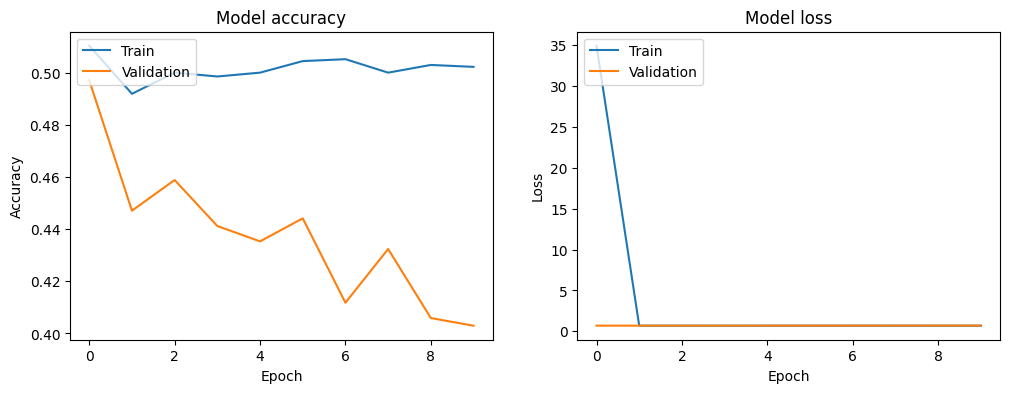

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [26]:
model.save('/content/drive/MyDrive/My_thesis_all/Pronunciation_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Save your model in the native Keras format
model.save('/content/drive/MyDrive/My_Thesis/DCNN_Pronunciation_Model.keras')


In [25]:
!pip install librosa
!pip install tensorflow
!pip install scipy
!pip install soundfile
!pip install noisereduce


In [28]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/My_Thesis/DCNN_Pronunciation_Model.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
from IPython.display import display, Audio, HTML

def save_mel_spectrogram(audio, sr, output_path):
    mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save mel spectrogram as an image
    spectrogram_path = 'temp_spectrogram.png'
    save_mel_spectrogram(audio, sr, spectrogram_path)
    # Load the image back
    image = tf.keras.preprocessing.image.load_img(spectrogram_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    return input_arr

def predict_and_display_feedback(file_path):
    input_arr = preprocess_audio(file_path)

    # Predict
    prediction = model.predict(input_arr)
    class_names = ['Correct', 'Incorrect']
    predicted_class = class_names[np.argmax(prediction)]

    # Display the result
    result_text = f'Prediction for {file_path}: {predicted_class}'
    print(result_text)

    # Play the uploaded audio file
    display(Audio(file_path))

    # Display feedback
    feedback_color = 'green' if predicted_class == 'Correct' else 'red'
    feedback_html = f'<p style="color:{feedback_color};font-size:20px;">{result_text}</p>'
    display(HTML(feedback_html))


In [30]:
from google.colab import files

# Upload audio file
uploaded = files.upload()

for filename in uploaded.keys():
    # Save the uploaded file to a temporary location
    file_path = filename

    # Predict and display feedback
    predict_and_display_feedback(file_path)


Saving 112001_01.wav to 112001_01.wav
1/1 [==============================] - 0s 145ms/step
Prediction for 112001_01.wav: Incorrect


In [31]:
!pip install librosa
!pip install tensorflow
!pip install scipy
!pip install soundfile
!pip install noisereduce
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


In [32]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

# Load your trained model in the native Keras format
model = tf.keras.models.load_model('/content/drive/MyDrive/My_Thesis/DCNN_Pronunciation_Model.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
from IPython.display import display, Audio, HTML
import ipywidgets as widgets

def save_mel_spectrogram(audio, sr, output_path):
    mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save mel spectrogram as an image
    spectrogram_path = 'temp_spectrogram.png'
    save_mel_spectrogram(audio, sr, spectrogram_path)
    # Load the image back
    image = tf.keras.preprocessing.image.load_img(spectrogram_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    return input_arr

def predict_and_display_feedback(file_path):
    input_arr = preprocess_audio(file_path)

    # Predict
    prediction = model.predict(input_arr)
    class_names = ['Correct', 'Incorrect']
    predicted_class = class_names[np.argmax(prediction)]

    # Display the result
    result_text = f'Prediction for {file_path}: {predicted_class}'
    print(result_text)

    # Play the uploaded audio file
    display(Audio(file_path))

    # Display feedback
    feedback_color = 'green' if predicted_class == 'Correct' else 'red'
    feedback_html = f'<p style="color:{feedback_color};font-size:20px;">{result_text}</p>'
    display(HTML(feedback_html))


In [34]:
import ipywidgets as widgets
from IPython.display import display

def handle_file_upload(change):
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        predict_and_display_feedback(filename)

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

1/1 [==============================] - 0s 101ms/step
Prediction for 112001_02.wav: Incorrect


1/1 [==============================] - 0s 35ms/step
Prediction for 1.wav: Correct


In [35]:
!pip install librosa
!pip install tensorflow
!pip install scipy
!pip install soundfile
!pip install noisereduce
!pip install ipywidgets


In [36]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

# Load your trained model in the native Keras format
model = tf.keras.models.load_model('/content/drive/MyDrive/My_Thesis/DCNN_Pronunciation_Model.keras')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
from IPython.display import display, Audio, HTML
import ipywidgets as widgets

def save_mel_spectrogram(audio, sr, output_path):
    mel_spect = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spect_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save mel spectrogram as an image
    spectrogram_path = 'temp_spectrogram.png'
    save_mel_spectrogram(audio, sr, spectrogram_path)
    # Load the image back
    image = tf.keras.preprocessing.image.load_img(spectrogram_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])  # Convert single image to a batch.
    return input_arr

def predict_word(word_audio):
    input_arr = preprocess_audio(word_audio)
    prediction = model.predict(input_arr)
    return prediction

def predict_ayat_and_display_feedback(file_path, ayat_text, words_audio_paths):
    words = ayat_text.split()
    feedback_html = '<p style="font-size:20px;">'
    feedback_audio_paths = []

    for i, word_audio in enumerate(words_audio_paths):
        prediction = predict_word(word_audio)
        class_names = ['Correct', 'Incorrect']
        predicted_class = class_names[np.argmax(prediction)]

        # Highlight the word
        color = 'green' if predicted_class == 'Correct' else 'red'
        feedback_html += f'<span style="color:{color};">{words[i]}</span> '

        # Collect feedback audio for incorrect words
        if predicted_class == 'Incorrect':
            feedback_audio_paths.append(word_audio)

    feedback_html += '</p>'
    display(HTML(feedback_html))

    # Play the uploaded audio file
    display(Audio(file_path))

    # Provide audio feedback for incorrect words
    for audio_path in feedback_audio_paths:
        display(Audio(audio_path))

def handle_file_upload(change):
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        ayat_text = "Provide the text of the Ayat corresponding to this audio file."
        words_audio_paths = ["/112001_01.wav",]  # Example paths, replace with actual split word paths
        predict_ayat_and_display_feedback(filename, ayat_text, words_audio_paths)

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

1/1 [==============================] - 0s 107ms/step


In [40]:
!pip install librosa
!pip install soundfile
!pip install noisereduce
!pip install ipywidgets
!pip install SpeechRecognition pydub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 12.8 MB/s eta 0:00:00


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
import soundfile as sf
import speech_recognition as sr
from IPython.display import display, Audio, HTML
import ipywidgets as widgets


In [42]:
def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def convert_audio_to_text(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio, language='ar-SA')
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save the processed audio back to disk
    processed_file_path = 'processed_' + file_path
    sf.write(processed_file_path, audio, sr)
    return processed_file_path

def handle_file_upload(change):
    results = ""
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        text = convert_audio_to_text(processed_file_path)
        results += f"<p><b>{filename}</b>: {text}</p>"
    display(HTML(results))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
import soundfile as sf
import speech_recognition as sr
from IPython.display import display, Audio, HTML
import ipywidgets as widgets

def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def convert_audio_to_text(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio, language='ar-SA')
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save the processed audio back to disk
    processed_file_path = 'processed_' + file_path
    sf.write(processed_file_path, audio, sr)
    return processed_file_path

def compare_texts(transcribed_text, correct_text):
    transcribed_words = transcribed_text.split()
    correct_words = correct_text.split()
    comparison_html = "<p style='font-size:20px;'>"

    for transcribed_word, correct_word in zip(transcribed_words, correct_words):
        color = 'green' if transcribed_word == correct_word else 'red'
        comparison_html += f"<span style='color:{color};'>{transcribed_word}</span> "

    comparison_html += "</p>"
    return comparison_html

def handle_file_upload(change):
    results = ""
    correct_text = "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ"  # Example correct text, replace with the actual text
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        transcribed_text = convert_audio_to_text(processed_file_path)
        comparison_html = compare_texts(transcribed_text, correct_text)
        results += f"<p><b>{filename}</b>:</p>{comparison_html}"
    display(HTML(results))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

In [44]:
!pip install gtts

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import noisereduce as nr
import soundfile as sf
import speech_recognition as sr
from gtts import gTTS
from IPython.display import display, Audio, HTML
import ipywidgets as widgets
import os


In [46]:
def reduce_noise(audio, sr):
    # Reduce noise using spectral gating
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def convert_audio_to_text(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio, language='ar-SA')
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    # Apply noise reduction
    audio = reduce_noise(audio, sr)
    # Save the processed audio back to disk
    processed_file_path = 'processed_' + file_path
    sf.write(processed_file_path, audio, sr)
    return processed_file_path

def compare_texts(transcribed_text, correct_text):
    transcribed_words = transcribed_text.split()
    correct_words = correct_text.split()
    comparison_html = "<p style='font-size:20px;'>"
    incorrect_words = []

    for transcribed_word, correct_word in zip(transcribed_words, correct_words):
        color = 'green' if transcribed_word == correct_word else 'red'
        comparison_html += f"<span style='color:{color};'>{transcribed_word}</span> "
        if transcribed_word != correct_word:
            incorrect_words.append(correct_word)

    comparison_html += "</p>"
    return comparison_html, incorrect_words

def generate_voice_feedback(incorrect_words):
    if incorrect_words:
        feedback_text = "The correct pronunciation for the incorrect words is: " + " ".join(incorrect_words)
    else:
        feedback_text = "All words are pronounced correctly."

    tts = gTTS(text=feedback_text, lang='en')
    tts.save("feedback.mp3")
    return "feedback.mp3"

def handle_file_upload(change):
    results = ""
    correct_text = "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ"  # Example correct text, replace with the actual text
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        transcribed_text = convert_audio_to_text(processed_file_path)
        comparison_html, incorrect_words = compare_texts(transcribed_text, correct_text)
        results += f"<p><b>{filename}</b>:</p>{comparison_html}"
        voice_feedback_path = generate_voice_feedback(incorrect_words)

    display(HTML(results))
    display(Audio(voice_feedback_path, autoplay=True))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

In [48]:
def reduce_noise(audio, sr):
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def convert_audio_to_text(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio, language='ar-SA')
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    audio = reduce_noise(audio, sr)
    processed_file_path = 'processed_' + os.path.basename(file_path)
    sf.write(processed_file_path, audio, sr)
    return processed_file_path

def create_correct_pronunciation_dict(files):
    correct_pronunciation_dict = {}
    for file_path in files:
        processed_file_path = preprocess_audio(file_path)
        text = convert_audio_to_text(processed_file_path)
        correct_pronunciation_dict[text] = file_path
    return correct_pronunciation_dict

# Example usage
uploaded_files = [
    "/112001_01.wav",
    "/112001_02.wav",
]

correct_pronunciation_dict = create_correct_pronunciation_dict(uploaded_files)
print(correct_pronunciation_dict)


{'قل هو الله احد': '/112001_01.wav', 'Google Speech Recognition could not understand audio': '/112001_02.wav'}


In [49]:
def compare_texts(transcribed_text, correct_text):
    transcribed_words = transcribed_text.split()
    correct_words = correct_text.split()
    comparison_html = "<p style='font-size:20px;'>"
    incorrect_words = []

    for transcribed_word, correct_word in zip(transcribed_words, correct_words):
        color = 'green' if transcribed_word == correct_word else 'red'
        comparison_html += f"<span style='color:{color};'>{transcribed_word}</span> "
        if transcribed_word != correct_word:
            incorrect_words.append(correct_word)

    comparison_html += "</p>"
    return comparison_html, incorrect_words

def generate_voice_feedback(incorrect_words):
    feedback_text = "The correct pronunciation for the incorrect words is: "
    feedback_files = []

    for word in incorrect_words:
        if word in correct_pronunciation_dict:
            feedback_files.append(correct_pronunciation_dict[word])
            feedback_text += word + " "

    if not feedback_files:
        feedback_text = "All words are pronounced correctly."
        tts = gTTS(text=feedback_text, lang='en')
        tts.save("feedback.mp3")
        return "feedback.mp3"

    combined_audio_path = "feedback_combined.wav"
    combined_audio = None

    for file_path in feedback_files:
        word_audio, sr = librosa.load(file_path, sr=None)
        if combined_audio is None:
            combined_audio = word_audio
        else:
            combined_audio = np.concatenate((combined_audio, word_audio))

    sf.write(combined_audio_path, combined_audio, sr)
    return combined_audio_path

def handle_file_upload(change):
    results = ""
    correct_text = "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ"  # Example correct text, replace with the actual text
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        transcribed_text = convert_audio_to_text(processed_file_path)
        comparison_html, incorrect_words = compare_texts(transcribed_text, correct_text)
        results += f"<p><b>{filename}</b>:</p>{comparison_html}"
        voice_feedback_path = generate_voice_feedback(incorrect_words)

    display(HTML(results))
    display(Audio(voice_feedback_path, autoplay=True))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

In [50]:
correct_pronunciation_dict = {
    "قل هو الله احد": "/112001_01.wav",
}

correct_ayat_pronunciation_path = "/112001_01.wav"  # Path to the correct pronunciation of the entire Ayat


In [51]:
def reduce_noise(audio, sr):
    reduced_noise = nr.reduce_noise(y=audio, sr=sr)
    return reduced_noise

def convert_audio_to_text(file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio, language='ar-SA')
        return text
    except sr.UnknownValueError:
        return "Google Speech Recognition could not understand audio"
    except sr.RequestError as e:
        return f"Could not request results from Google Speech Recognition service; {e}"

def preprocess_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    audio = reduce_noise(audio, sr)
    processed_file_path = 'processed_' + os.path.basename(file_path)
    sf.write(processed_file_path, audio, sr)
    return processed_file_path

def compare_texts(transcribed_text, correct_text):
    transcribed_words = transcribed_text.split()
    correct_words = correct_text.split()
    comparison_html = "<p style='font-size:20px;'>"
    incorrect_words = []

    for transcribed_word, correct_word in zip(transcribed_words, correct_words):
        color = 'green' if transcribed_word == correct_word else 'red'
        comparison_html += f"<span style='color:{color};'>{transcribed_word}</span> "
        if transcribed_word != correct_word:
            incorrect_words.append(correct_word)

    comparison_html += "</p>"
    return comparison_html, incorrect_words

def generate_voice_feedback(incorrect_words):
    if incorrect_words:
        feedback_text = "The correct pronunciation for the incorrect words is: " + " ".join(incorrect_words)
    else:
        feedback_text = "All words are pronounced correctly."

    tts = gTTS(text=feedback_text, lang='en')
    tts.save("feedback.mp3")
    return "feedback.mp3"

def handle_file_upload(change):
    results = ""
    correct_text = "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الْحَمْدُ لِلَّهِ رَبِّ"  # Example correct text, replace with the actual text
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        transcribed_text = convert_audio_to_text(processed_file_path)
        comparison_html, incorrect_words = compare_texts(transcribed_text, correct_text)
        results += f"<p><b>{filename}</b>:</p>{comparison_html}"
        voice_feedback_path = generate_voice_feedback(incorrect_words)

    display(HTML(results))
    display(Audio(voice_feedback_path, autoplay=True))
    display(Audio(correct_ayat_pronunciation_path, autoplay=True))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

# Display the upload widget
display(upload_widget)


FileUpload(value={}, accept='.wav', description='Upload', multiple=True)

In [52]:
def handle_file_upload(change):
    results = ""
    correct_text = "بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الْحَمْدُ لِلَّهِ رَبِّ"  # Example correct text, replace with the actual text
    for filename, fileinfo in change['new'].items():
        with open(filename, 'wb') as f:
            f.write(fileinfo['content'])
        processed_file_path = preprocess_audio(filename)
        transcribed_text = convert_audio_to_text(processed_file_path)
        comparison_html, incorrect_words = compare_texts(transcribed_text, correct_text)
        results += f"<p><b>{filename}</b>:</p>{comparison_html}"
        voice_feedback_path = generate_voice_feedback(incorrect_words)

    # Display the results in a cohesive interface
    output.clear_output()
    with output:
        display(HTML(results))
        display(Audio(voice_feedback_path, autoplay=True))
        display(Audio(correct_ayat_pronunciation_path, autoplay=True))

upload_widget = widgets.FileUpload(accept='.wav', multiple=True)
upload_widget.observe(handle_file_upload, names='value')

output = widgets.Output()

app = widgets.VBox([
    widgets.HTML("<h2>Pronunciation Correction Application</h2>"),
    upload_widget,
    output
])

# Display the application interface
display(app)


In [55]:
# Save your model in the native Keras format
model.save('/content/drive/MyDrive/My_Thesis/Ayat_Pronunciation_Model.keras')